In [1]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing Dataset**

In [ ]:
cd /content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P9_Ensemble Learning

/content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P9_Ensemble Learning


In [ ]:
ls

 breast-cancer.csv  'Main_Models (2).ipynb'  'wine (1).csv'


In [ ]:
df = pd.read_csv('breast-cancer.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

**Checking Dataset**

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 32)

In [ ]:
vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
y_cols = 'diagnosis'
x_cols = vars
# x_cols.remove(y_cols)

In [ ]:
dfdtype = pd.DataFrame(df.dtypes)
flag_cols = list(dfdtype[dfdtype.iloc[:,0] == 'object'].index)

In [ ]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
4762/24037

0.19811124516370596

In [ ]:
zerodf = df[df[y_cols]==0].sample(112)
onedf = df[df[y_cols]== 1]

newdf = pd.concat([zerodf, onedf], axis=0)
newdf[y_cols].value_counts()

1    357
0    112
Name: diagnosis, dtype: int64

In [ ]:
df[y_cols].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:

newdf[y_cols].value_counts()

1    357
0    112
Name: diagnosis, dtype: int64

**Statistical Summary of Dataset**

In [ ]:

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
newdf = newdf.dropna()

In [ ]:
# Helper functions to calculate the performance of our models.
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(str(title.split('\n')[0])+'.png')
    plt.show()
    
def overall_error_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fn = cnf_matrix[1,0]
    fp = cnf_matrix[0,1]
    tn = cnf_matrix[0,0]
    tp = cnf_matrix[1,1]
    n = len(y_test)
    return (fn+fp)/n

def sensitivity(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tap = pd.DataFrame(y_test).iloc[:,0].value_counts()[1]
    tp = cnf_matrix[1,1]
    return tp/tap

def false_pos_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fp = cnf_matrix[0,1]
    tan = pd.DataFrame(y_test).iloc[:,0].value_counts()[0]
    return fp/tan

def specificity(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tn = cnf_matrix[0,0]
    tan = pd.DataFrame(y_test).iloc[:,0].value_counts()[0]
    return tn/tan

def false_neg_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fn = cnf_matrix[1,0]
    tap = pd.DataFrame(y_test).iloc[:,0].value_counts()[1]
    return fn/tap

def prop_true_pos(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tpp = pd.DataFrame(y_pred).iloc[:,0].value_counts()[1]
    except:
        return 0
    tp = cnf_matrix[1,1]
    return tp/tpp

def prop_true_neg(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tn = cnf_matrix[0,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tn/tpn

def recall(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tp = cnf_matrix[1,1]
        fn = cnf_matrix[1,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tp/(fn+tp)

def precision(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tp = cnf_matrix[1,1]
        fp = cnf_matrix[0,1]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tp/(fp+tp)

def npv(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        fn = cnf_matrix[1,0]
        fn = cnf_matrix[1,0]
        tn = cnf_matrix[0,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tn/(tn+fn)

def f1score(y_pred, y_test):
    prec = precision(y_pred, y_test)
    rec = recall(y_pred, y_test)
    f1 = 2 * ((prec * rec)/(prec + rec))
    return f1

def get_descriptive_data(y_pred, y_test):
    print("Accuracy: %f%%" %(round(accuracy_score(y_test, y_pred)*100,2)))
    print("Overall Error Rate: %f%%" %(round(overall_error_rate(y_pred, y_test)*100,2)))
    print('False Positive Rate: %f%%' %(round(false_pos_rate(y_pred, y_test)*100,2)))
    print('False Negative Rate: %f%%' %(round(false_neg_rate(y_pred, y_test)*100,2)))
    print('Specificity: %f%%' %(round(specificity(y_pred, y_test)*100,2)))
    print("Sensitivity: %f%%" %(round(sensitivity(y_pred, y_test)*100,2)))
    print('Proportion True Positive: %f%%' %(round(prop_true_pos(y_pred, y_test)*100,2)))
    print('Proportion True Negative: %f%%' %(round(prop_true_neg(y_pred, y_test)*100,2)))
    print("recall: %f%%" %(round(recall(y_pred, y_test)*100,2)))
    print("precision: %f%%" %(round(precision(y_pred, y_test)*100,2)))
    print("FDR: %f%%" %(100-round(precision(y_pred, y_test)*100,2)))
    print("NPV: %f%%" %(round(precision(y_pred, y_test)*100,2)))
    print("FOR: %f%%" %(100-round(npv(y_pred, y_test)*100,2)))
    print("F1SCORE: %f%%" %(100-round(f1score(y_pred, y_test)*100,2)))

**Single RANDOM FOREST ON 75 25 TRAIN TEST SPLIT**

Accuracy: 98.310000%
Overall Error Rate: 1.690000%
False Positive Rate: 7.690000%
False Negative Rate: 0.000000%
Specificity: 92.310000%
Sensitivity: 100.000000%
Proportion True Positive: 97.870000%
Proportion True Negative: 100.000000%
recall: 100.000000%
precision: 97.870000%
FDR: 2.130000%
NPV: 97.870000%
FOR: 0.000000%
F1SCORE: 1.080000%


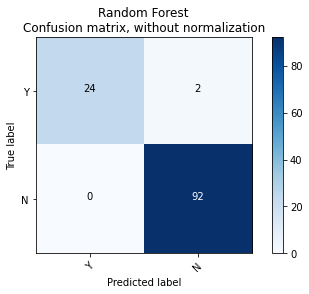

In [ ]:
# Random Forrest
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].values, 
                                                    newdf[y_cols].values, 
                                                    test_size=0.25, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')

**Single RANDOM FOREST ON 70 30 TRAIN TEST SPLIT**

Accuracy: 96.450000%
Overall Error Rate: 3.550000%
False Positive Rate: 15.150000%
False Negative Rate: 0.000000%
Specificity: 84.850000%
Sensitivity: 100.000000%
Proportion True Positive: 95.580000%
Proportion True Negative: 100.000000%
recall: 100.000000%
precision: 95.580000%
FDR: 4.420000%
NPV: 95.580000%
FOR: 0.000000%
F1SCORE: 2.260000%


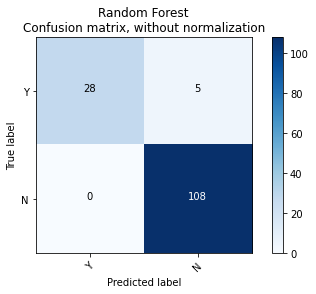

In [ ]:
# Random Forrest
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].values, 
                                                    newdf[y_cols].values, 
                                                    test_size=0.3, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')

**Single RANDOM FOREST ON 80 20 TRAIN TEST SPLIT**

Accuracy: 97.870000%
Overall Error Rate: 2.130000%
False Positive Rate: 11.110000%
False Negative Rate: 0.000000%
Specificity: 88.890000%
Sensitivity: 100.000000%
Proportion True Positive: 97.440000%
Proportion True Negative: 100.000000%
recall: 100.000000%
precision: 97.440000%
FDR: 2.560000%
NPV: 97.440000%
FOR: 0.000000%
F1SCORE: 1.300000%


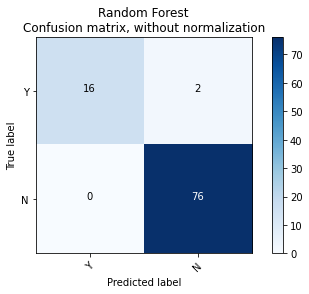

In [ ]:
# Random Forrest
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].values, 
                                                    newdf[y_cols].values, 
                                                    test_size=0.20, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
np.random.seed(1234)
                                    
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')

**Single Logistic Regression 70 30 train test**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 93.620000%
Overall Error Rate: 6.380000%
False Positive Rate: 20.450000%
False Negative Rate: 0.000000%
Specificity: 79.550000%
Sensitivity: 100.000000%
Proportion True Positive: 91.510000%
Proportion True Negative: 100.000000%
recall: 100.000000%
precision: 91.510000%
FDR: 8.490000%
NPV: 91.510000%
FOR: 0.000000%
F1SCORE: 4.430000%


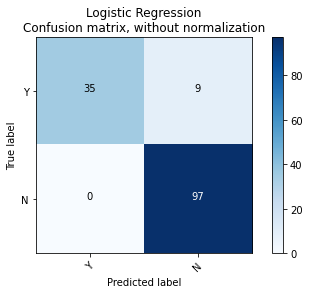

In [ ]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.30, random_state=42)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

**Single Logistic Regression 75 25 train test**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 94.070000%
Overall Error Rate: 5.930000%
False Positive Rate: 20.000000%
False Negative Rate: 0.000000%
Specificity: 80.000000%
Sensitivity: 100.000000%
Proportion True Positive: 92.220000%
Proportion True Negative: 100.000000%
recall: 100.000000%
precision: 92.220000%
FDR: 7.780000%
NPV: 92.220000%
FOR: 0.000000%
F1SCORE: 4.050000%


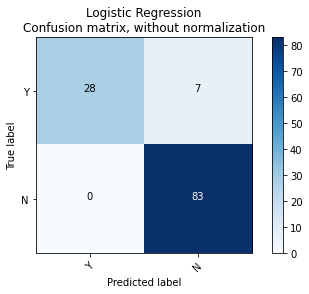

In [ ]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

**Single SUPPORT VECTOR MACHINE 75 25 train test**

Accuracy: 94.070000%
Overall Error Rate: 5.930000%
False Positive Rate: 8.430000%
False Negative Rate: 0.000000%
Specificity: 33.730000%
Sensitivity: 237.140000%
Proportion True Positive: 296.430000%
Proportion True Negative: 31.110000%
recall: 100.000000%
precision: 92.220000%
FDR: 7.780000%
NPV: 92.220000%
FOR: 0.000000%
F1SCORE: 4.050000%


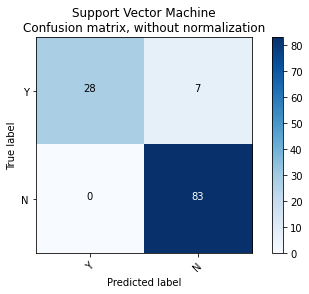

In [ ]:
# Support Vector Machine
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

y_score = svm.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_score)
svm_roc_auc = auc(svm_fpr, svm_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Support Vector Machine\nConfusion matrix, without normalization')

**Single Logistic Regression 80 20 train test**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 95.740000%
Overall Error Rate: 4.260000%
False Positive Rate: 15.380000%
False Negative Rate: 0.000000%
Specificity: 84.620000%
Sensitivity: 100.000000%
Proportion True Positive: 94.440000%
Proportion True Negative: 100.000000%
recall: 100.000000%
precision: 94.440000%
FDR: 5.560000%
NPV: 94.440000%
FOR: 0.000000%
F1SCORE: 2.860000%


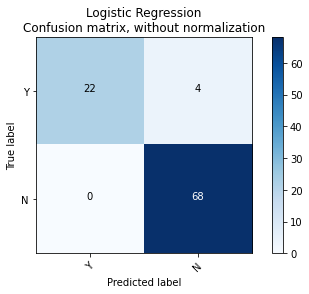

In [ ]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

**Single K-Nearest Neighbour 70 30 trai test**

Accuracy: 92.900000%
Overall Error Rate: 7.100000%
False Positive Rate: 10.190000%
False Negative Rate: 0.000000%
Specificity: 33.330000%
Sensitivity: 229.790000%
Proportion True Positive: 300.000000%
Proportion True Negative: 30.250000%
recall: 100.000000%
precision: 90.760000%
FDR: 9.240000%
NPV: 90.760000%
FOR: 0.000000%
F1SCORE: 4.850000%


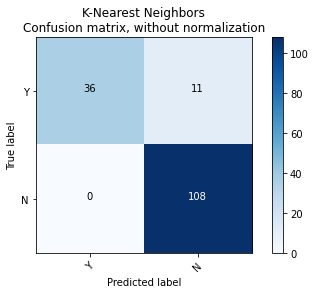

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.33, random_state=42)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_score = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

**Single K-Nearest Neighbour 75 25 train test**

Accuracy: 92.370000%
Overall Error Rate: 7.630000%
False Positive Rate: 10.840000%
False Negative Rate: 0.000000%
Specificity: 31.330000%
Sensitivity: 237.140000%
Proportion True Positive: 319.230000%
Proportion True Negative: 28.260000%
recall: 100.000000%
precision: 90.220000%
FDR: 9.780000%
NPV: 90.220000%
FOR: 0.000000%
F1SCORE: 5.140000%


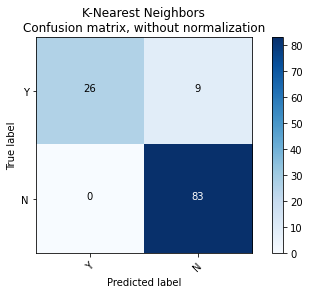

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_score = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

**Single K-Nearest Neighbour 80 20 train test**

Accuracy: 93.620000%
Overall Error Rate: 6.380000%
False Positive Rate: 8.820000%
False Negative Rate: 0.000000%
Specificity: 29.410000%
Sensitivity: 261.540000%
Proportion True Positive: 340.000000%
Proportion True Negative: 27.030000%
recall: 100.000000%
precision: 91.890000%
FDR: 8.110000%
NPV: 91.890000%
FOR: 0.000000%
F1SCORE: 4.230000%


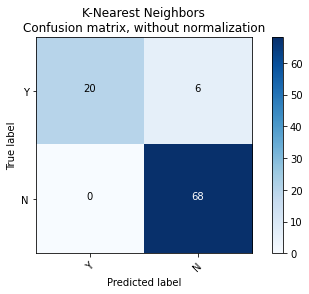

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_score = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

**Single Decision Tree 80 20 train test**

Accuracy: 93.620000%
Overall Error Rate: 6.380000%
False Positive Rate: 8.820000%
False Negative Rate: 0.000000%
Specificity: 29.410000%
Sensitivity: 261.540000%
Proportion True Positive: 340.000000%
Proportion True Negative: 27.030000%
recall: 100.000000%
precision: 91.890000%
FDR: 8.110000%
NPV: 91.890000%
FOR: 0.000000%
F1SCORE: 4.230000%


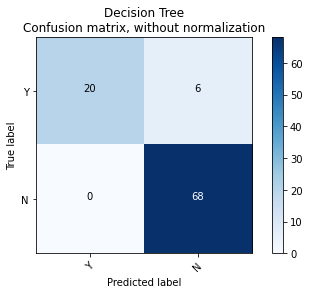

In [ ]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
y_score = dtc.predict_proba(X_test)[:, 1]
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, y_score)
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision Tree\nConfusion matrix, without normalization')

**Single Naive Bayes 80 20 train test**

Accuracy: 93.620000%
Overall Error Rate: 6.380000%
False Positive Rate: 8.820000%
False Negative Rate: 0.000000%
Specificity: 29.410000%
Sensitivity: 261.540000%
Proportion True Positive: 340.000000%
Proportion True Negative: 27.030000%
recall: 100.000000%
precision: 91.890000%
FDR: 8.110000%
NPV: 91.890000%
FOR: 0.000000%
F1SCORE: 4.230000%


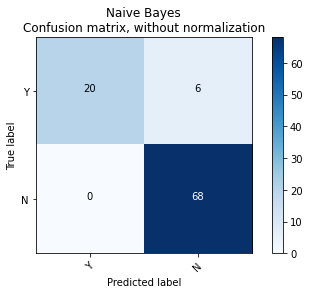

In [ ]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_dtc = gnb.predict(X_test)
y_score = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_score)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Naive Bayes\nConfusion matrix, without normalization')

**Single ANN 80 20 train test**

Accuracy: 93.620000%
Overall Error Rate: 6.380000%
False Positive Rate: 8.820000%
False Negative Rate: 0.000000%
Specificity: 29.410000%
Sensitivity: 261.540000%
Proportion True Positive: 340.000000%
Proportion True Negative: 27.030000%
recall: 100.000000%
precision: 91.890000%
FDR: 8.110000%
NPV: 91.890000%
FOR: 0.000000%
F1SCORE: 4.230000%


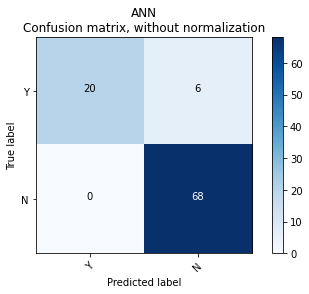

In [ ]:
# ANN
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')
y_pred_dtc = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
clf_fpr, clf_tpr, _ = roc_curve(y_test, y_score)
clf_roc_auc = auc(clf_fpr, clf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='ANN\nConfusion matrix, without normalization')

In [ ]:
# BIRCH
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
from sklearn.cluster import Birch
brc = Birch(branching_factor = 40, n_clusters = 3, threshold = 1.5)
brc = Birch(n_clusters=None)
brc.fit(X_train)
Birch(n_clusters=None)
brc.predict(X_train)
y_pred_brc = brc.predict(X_train)

brc_fpr, brc_tpr, _ = roc_curve(y_test, y_score)
brc_roc_auc = auc(brc_fpr, brc_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='\nBIRCH')

ValueError: ignored

In [ ]:
data = df[["PCAR_PNTS", "Tot_Spend"]]

KeyError: ignored

In [ ]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=3, threshold=2.5)
model.fit(data)
pred = model.predict(data)
plt.scatter(data["PCAR_PNTS"], data["Tot_Spend"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
plt.show()

NameError: ignored

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install imputer

ERROR: Could not find a version that satisfies the requirement imputer (from versions: none)
ERROR: No matching distribution found for imputer


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = df.values

# Now impute it
imputer = SimpleImputer()
imputedData = imputer.fit_transform(values)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [ ]:
X = normalizedData[:,0:117]
Y = normalizedData[:,117]

**Bagging Decision Tree**

In [ ]:
kfold = model_selection.KFold(n_splits=15, random_state=None)
dtc = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**Adaboost Decision Tree**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


**Voting Ensemble Decision Tree**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
np.random.seed(1234)
estimators = []
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

**Bagging Random Forest**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=15, random_state=None)
rf = RandomForestClassifier()
X, Y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**Adaboost Random Forest**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


**Voting Ensemble Random Forest**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('random', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9999305555555555


**Bagging KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from statistics import mean
from statistics import *
# define dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(base_estimator=KNeighborsClassifier())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**ADABOOST KNN**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


**VOTING KNN**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = KNeighborsClassifier()
estimators.append(('random', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8687803804368801


**BAGGING LOGISTIC**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from statistics import mean
from statistics import *
# define dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(base_estimator=LogisticRegression(random_state=1),n_estimators=100,max_features=10,max_samples=100,random_state=1, n_jobs=5)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**ADABOOST LOGISTIC**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

**VOTING LOGISTIC**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('random', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

**BAGGING NAIVE BAYES**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from statistics import mean
from statistics import *
# define dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(GaussianNB(),n_estimators = 10, max_features = 0.5,random_state = 0, n_jobs = -1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

**ADABOOST NAIVE BAYES**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

**VOTING NAIVE BAYES**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = GaussianNB()
estimators.append(('gaussian', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
# define dataset
from sklearn.model_selection import cross_val_score
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
model = BaggingClassifier(MLPClassifier(),n_estimators = 10, max_features = 0.5,random_state = 0, n_jobs = -1)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2), max_iter=1001)
clf = BaggingClassifier(mlp, n_estimators=8)
clf.fit(X,Y)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

In [ ]:
plt.figure(1, figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr,color='b', label='Random Forestz ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot(gnb_fpr, gnb_tpr,color='m', label='Naive Bayes ROC curve (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_fpr, lr_tpr,color='r', label='Logistic Regression ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot(svm_fpr, svm_tpr,color='k', label='Support Vector Machine ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot(knn_fpr, knn_tpr,color='g', label='K-Nearest Neighbors ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot(dtc_fpr, dtc_tpr,color='c', label='Decision Tree ROC curve (area = %0.2f)' % dtc_roc_auc)
plt.plot(clf_fpr, clf_tpr,color='y', label='NN ROC curve (area = %0.2f)' % clf_roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_curve.png')
plt.show()

In [ ]:
pip install hasy_tools

**BAGGING SVM**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
import hasy_tools  
from sklearn.datasets import make_classification


svm = LinearSVC(random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=314)
model.fit(X, Y)
X, Y = make_classification(n_samples=10000, n_features=20, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BaggingClassifier()
# define evaluation procedure

print(results.mean())

0.9999305555555555


**ADABOOST SVM**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9937999999999999


**VOTING SVM**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = GaussianNB()
estimators.append(('gaussian', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9926999999999999


**NN BAGGING**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# define dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
X, Y = make_classification(n_samples=10000, n_features=20, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4
                      
clf.fit(X, Y)

print(results.mean())

SyntaxError: ignored

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame


X, Y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=2, random_state=2)
X, Y = make_classification(n_samples=10000, n_features=20, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(5, activation='softmax'))
model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# define evaluation procedure

print(results.mean())

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, LeavePOut

def KFold_test(X, y, folds, trained_model):
    n_folds    = len(folds)
    accuracies = []
    n    = X.shape[0]
    # Run K-folds
    for k in folds:
        cv     = KFold(n, n_folds=k, random_state=12, shuffle=True) if k > 0 else LeavePOut(n, p=abs(k))
        scores = cross_val_score(trained_model, X, y, cv=cv)
        accuracies.append(100 * scores.mean())
        print("K = %d, accuracy: %0.2f%%" % (k, accuracies[-1]))
    return accuracies

In [ ]:
lr_accuracies = KFold_test(newdf[x_cols], newdf[y_cols], folds, lr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_boston
from tqdm import tqdm 
contrib_sum = np.zeros((25,2))

for i in tqdm(range(100)):
    # Random Forrest
    X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].as_matrix(), 
                                                        newdf[y_cols].as_matrix(), 
                                                        test_size=2820, 
                                                        random_state=i)
    rf = RandomForestClassifier(random_state=i, n_jobs=-1)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    prediction, bias, contributions = ti.predict(rf, X_test)
    # contrib_sum = contributions[0]
    for i in range(contributions.shape[0]):
        contrib_sum += contributions[i]

In [ ]:
# Data Cleaning  - Remove columns which are not necessary
cols = []

for col in df.columns: 
    cols.append(col)
    
print(cols)

In [ ]:
columns_to_remove = ['Sales per Visit', 'Spending_Month_2_3', 'Spending_Month_4_5_6', 'bc purchase visits', 'ln total net sales', 'ln_ave spending per vi